### 2nd European Conference on Social Networks, June 14-17, 2016, Paris (http://eusn2016.sciencesconf.org/)
## Workshop 11:
# Mining (together with a bit of web scraping) of large social networks from Twitter using Python (and Ruby)
## By Moses Boudourides (<mailto:Moses.Boudourides@gmail.com>) and Sergios Lenis (<mailto:sergioslenis@gmail.com>) 
## University of Patras, Greece

<p> </p>

<p> </p>

<p> </p>

**Table of Contents**

[I. Installing/Importing Prerequisite Python Modules and Scripts](#I)

[II. Creating a Twitter App and Obtaining OAuth Settings](#II)

[III. Mining Twitter by API Data Extraction](#III)

[IV. Scraping Data from Twitter](#IV)

[V. Statistical & Network Analysis](#V)

<p> </p>

<p> </p>

<p> </p>

<a id='I'></a>
## I. Installing/Importing Prerequisite Python Modules and Scripts

### **The following cell imports the prerequisite Python modules for this network to run**

In [1]:
import pandas as pd
import json 
import os
import imp
from IPython.display import Image

### **First, one has to download the *github* directory *https://github.com/mboudour/TwitterMining*, where everything needed for this notebook to run is included.**

### **In particular, one needs to have already installed all the modules imported in the script** *collect_tweets_notebook.py*. Some of these modules can be installed and imported from the notebook as follows (without #):

In [2]:
# !pip install twitter
# import twitter

<a id='II'></a>
## II. Creating a Twitter App and Obtaining OAuth Settings

### **Assuming that one already possesses a Twitter account, one needs to create app from  http://twitter.com/apps/new by following the instuctions given in the screenshots that follow:**

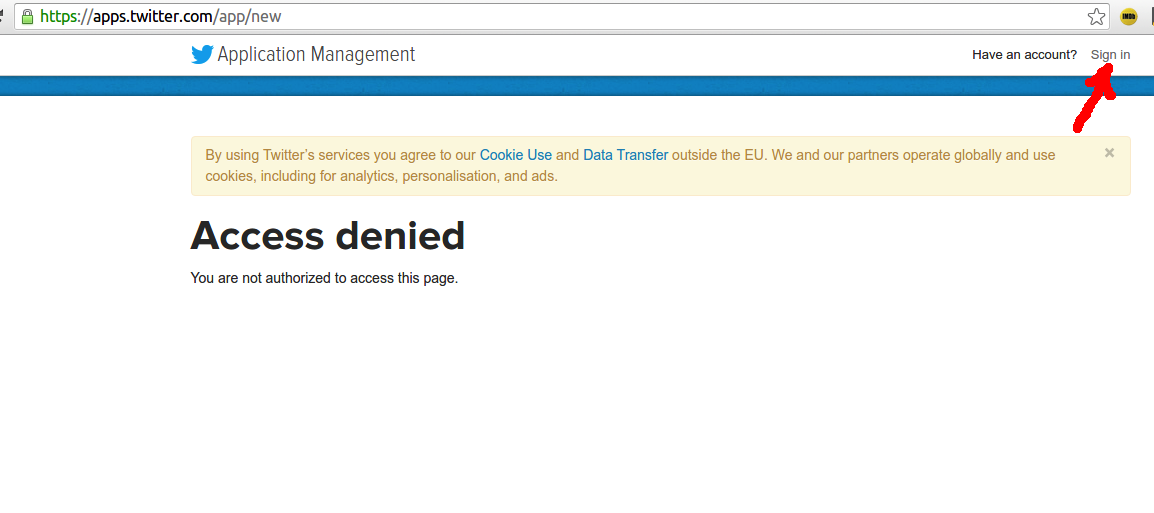

In [3]:
# The first time one accesses the page http://twitter.com/apps/new, one is requested to sign in.

Image("pngs/apptwitter_new.png")

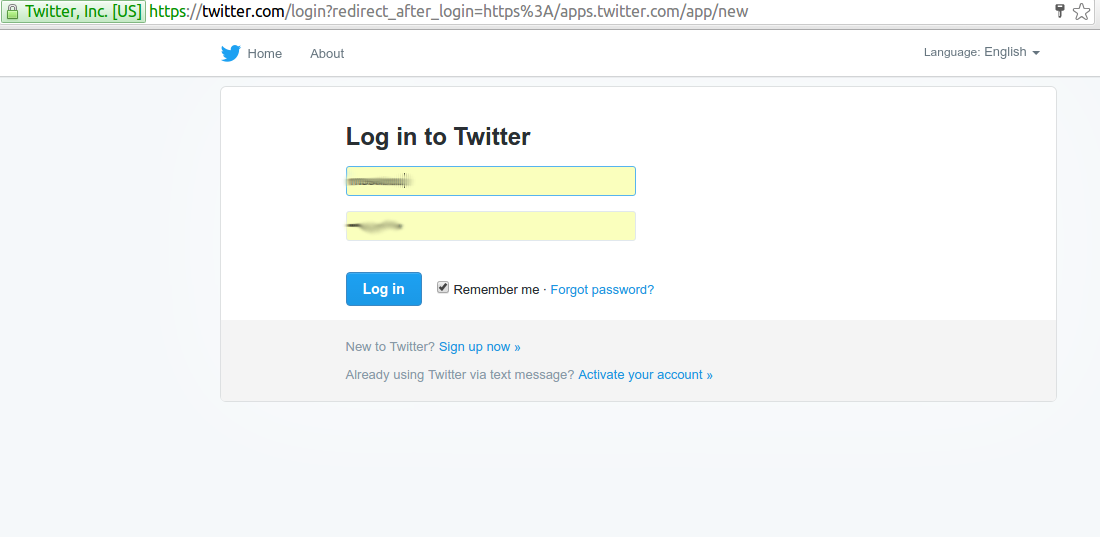

In [4]:
# First, one need to log in her Twitter account (assuming that one already possesses it).

Image("pngs/login_to_twitter.png")

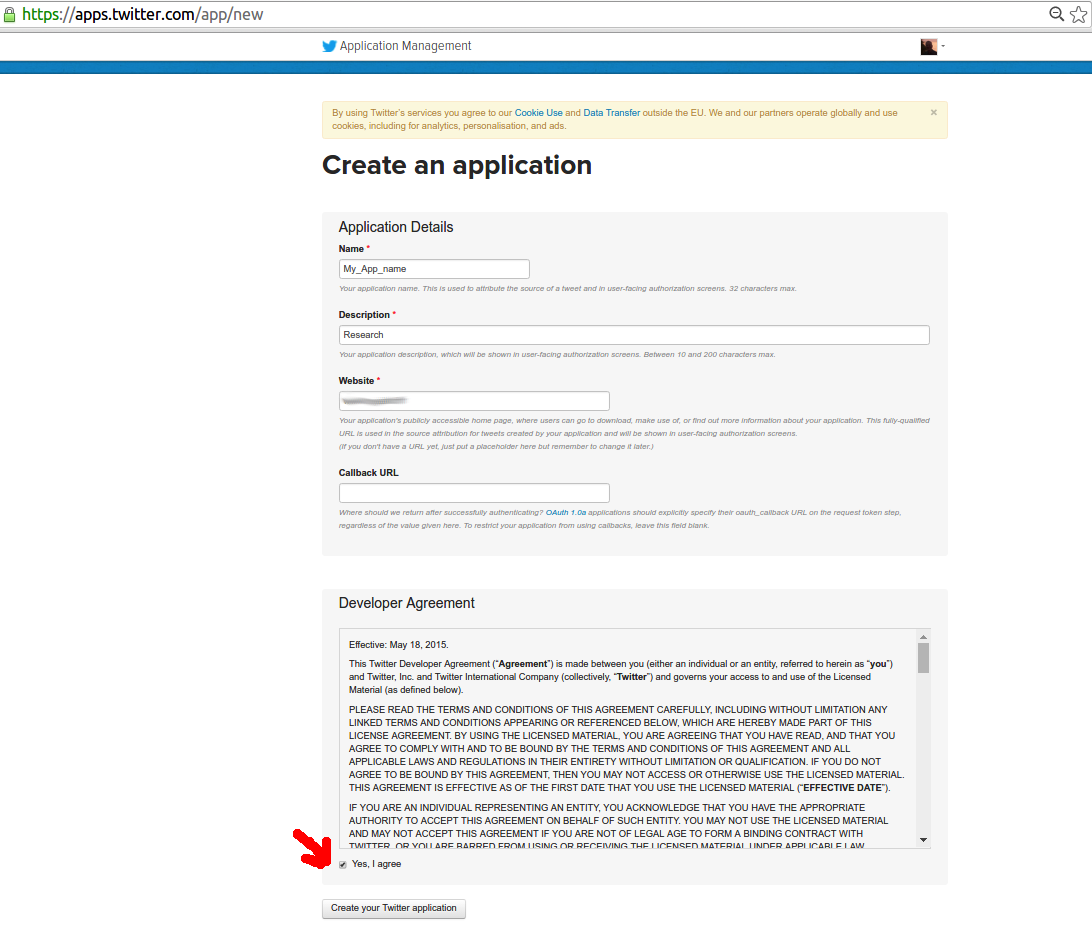

In [5]:
# First, one should create a new application (or use an App already created).

Image("pngs/create_app.png")

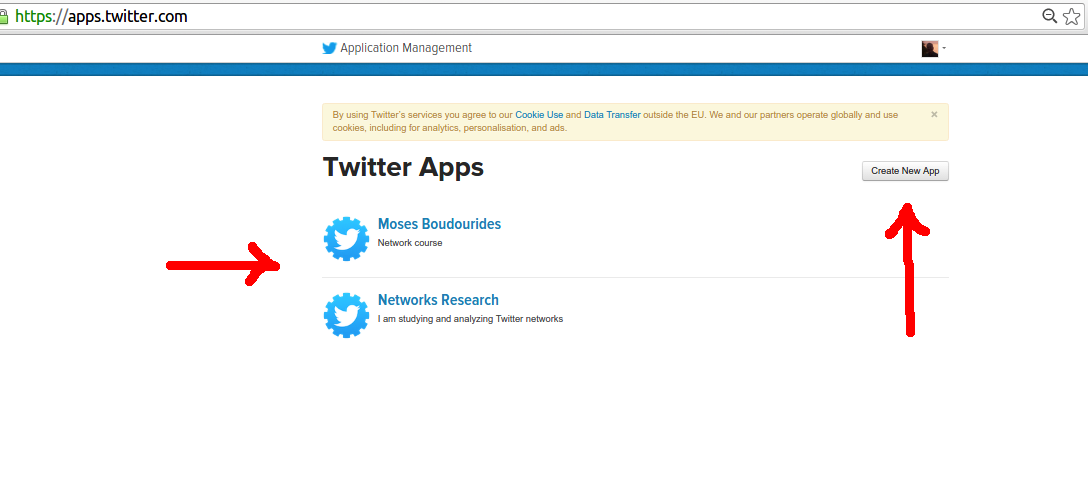

In [6]:
# One always has the option to creat a new App (if needed).

Image("pngs/select_app.png")

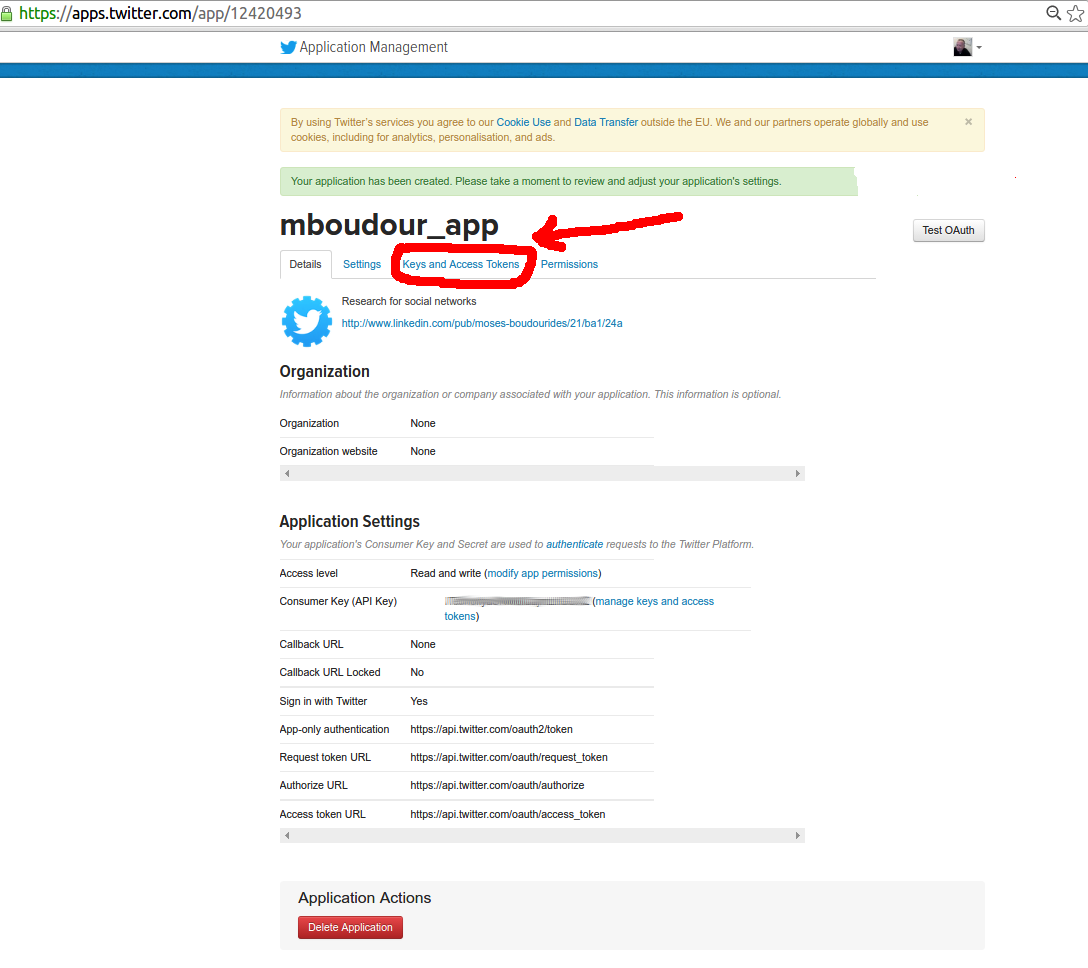

In [7]:
# After creating/accessing an App, one should click the link "Keys and Access Tokens."

Image("pngs/app_created.png")

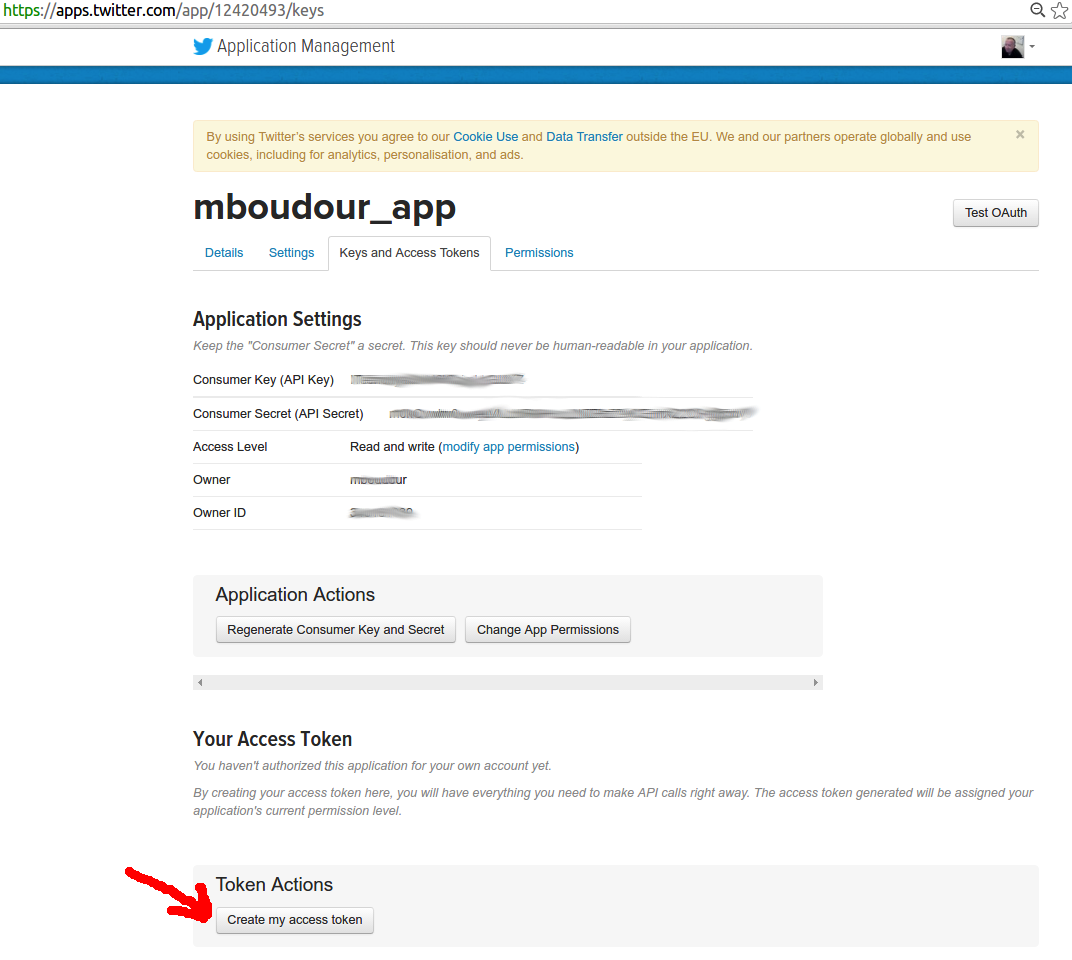

In [8]:
# Next, to access tokens, one should click "Token Actions > Create my access token."

Image("pngs/create_tokens_pass.png")

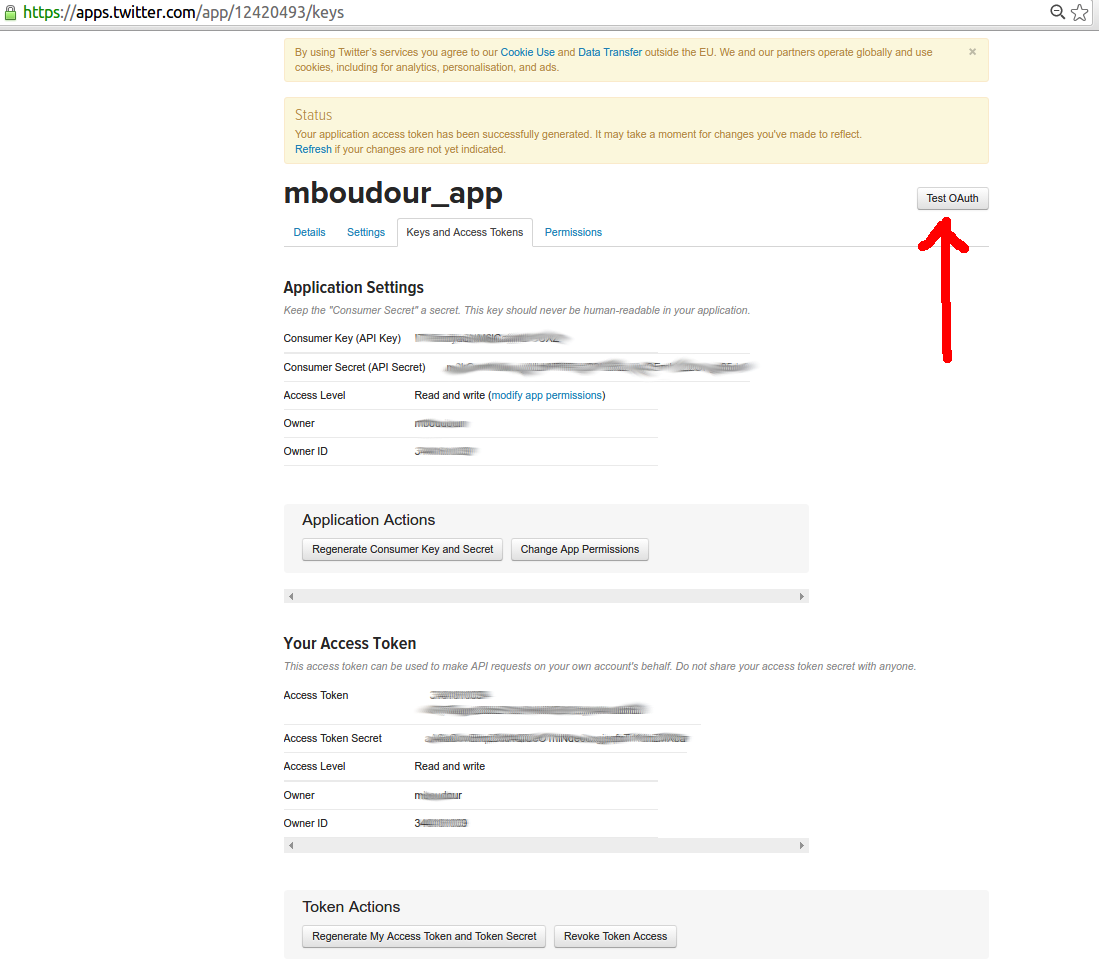

In [9]:
# To obtain tokens, one should click "Test OAuth."

Image("pngs/tokens_created.png")

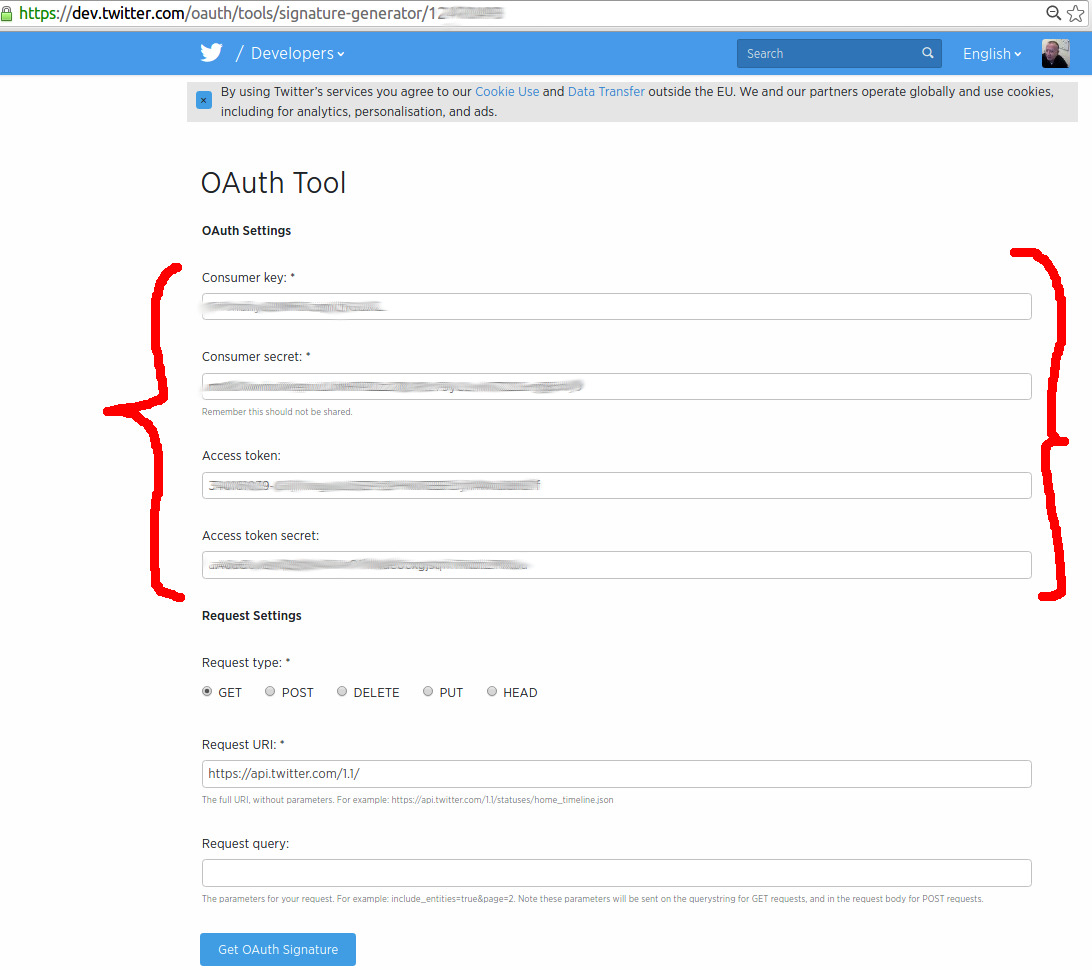

In [10]:
# Thus, one retrieves her OAuth settings.

Image("pngs/token_pass_final.png")

<a id='III'></a>
## III. Mining Twitter by API Data Extraction

### **Setting Input and Output Directories**

In [11]:
input_dir='/home/mab/github_repos/TwitterMining'

output_dir='/home/mab/Desktop/twitTemp'

cred_dic=None
# cred_dic='/home/mab/github_repos/TwitterMining/credentials/auth_cred.txt'
# cred_dic='/media/sergios-len/Elements/Brighton_workshop/auth_cred.txt'

pp= !pwd
os.chdir(input_dir)
from test_class_tpa import create_df
import collect_tweets_notebook as ctn

os.chdir(pp[0])

def create_beaker_com_dict(sps):
    nsps={}
    for k,v in sps.items():
        nsps[k]=[]
        if k=='date_split':
            for kk in sorted(v.keys()):
                nsps[k].append(v[kk].strftime('%Y%m%d'))
        else:
            for kk in sorted(v.keys()):
                nsps[k].append(v[kk])

    return nsps

I am being imported from another module


### **Authentication and login in Twitter API**

In [12]:
vv=ctn.UserAuth(auth_file=cred_dic)

### **After the authentication tokens are known, one has to insert them below by decommenting and running the following three cells:**

In [ ]:
vv.login()

In [ ]:
vv.check_login()

In [ ]:
twi_api=vv.get_auth()

### **Setting up a Search**
#### **Further info about how to build a Twitter query is available at: https://dev.twitter.com/rest/public/search.**

In [ ]:
search_term='#France - Paris'

In [ ]:
sea=ctn.TwitterSearch(twi_api,search_text=search_term,working_path=output_dir,out_file_dir=None,
max_pages=10,results_per_page=100,sin_id=None,max_id=None,verbose=True)

In [ ]:
sea.streamsearch()

### **<font color='red'>To interrupt the collection of tweets initiated above, one has to click "Kernel > Interrupt" from the Notebook menu.</font>**

### **The data collected from the above search are saved as a json file in the above defined output_dir named by the above defined search_term.**

### **In the json file, there are four main “objects” provided by the API:** 
* **Tweets,** 
* **Users,** 
* **Entities and** 
* **Places.**

### **Definitions and info about all these ojects is given in https://dev.twitter.com/overview/api.**

## Selecting 21 practically intersesting "objects" and creating a Pandas data frame with them as columns.

In [13]:
columnss=['id','user_id','username','created_at','language','hashtag_count','retweet_count','mention_count',
          'statuses_count','followers_count','friends_count','listed_count','videos_count','photos_count',
          'undef_count','coordinates','bounding','place','hashtags','mentions','text'] 
for i in columnss:
    print i
    
# json_dir='/home/mab/Desktop/twitTemp/Output'
# selt='rr'
# outname=''
# pdf,httoadds=create_df(json_dir,selt,outname,multihas=False,r_or_p='python')
# pdf=pdf[columnss]
# print pdf.head(3)

# Accessing the columns of a Tweet in the Data Frame from the id of the Tweet:

# some_id='736628805335420928'
# ppd=pdf[pdf['id']==some_id]
# tx=ppd.text.tolist()[0]
# screen_name=ppd.username.tolist()[0]
# idt=ppd.id.tolist()[0]
# print tx
# link=' https://twitter.com/%s/status/%s ' %(screen_name,idt)
# link

id
user_id
username
created_at
language
hashtag_count
retweet_count
mention_count
statuses_count
followers_count
friends_count
listed_count
videos_count
photos_count
undef_count
coordinates
bounding
place
hashtags
mentions
text


<a id='IV'></a>
## IV. Scraping Data from Twitter

## **For Twitter Scraping, we are using the *Beaker Notebook *https://pub.beakernotebook.com/publications/ee134c26-2b23-11e6-abb8-6fa10fd07640?fullscreen=true**.

## **Again, one needs to have already installed all the modules imported in this *Beaker Notebook* as well in all the scripts of the *github* directory *https://github.com/mboudour/TwitterMining*.** 

## **First, one should start with an advanced search at *https://twitter.com/search-advanced.* **

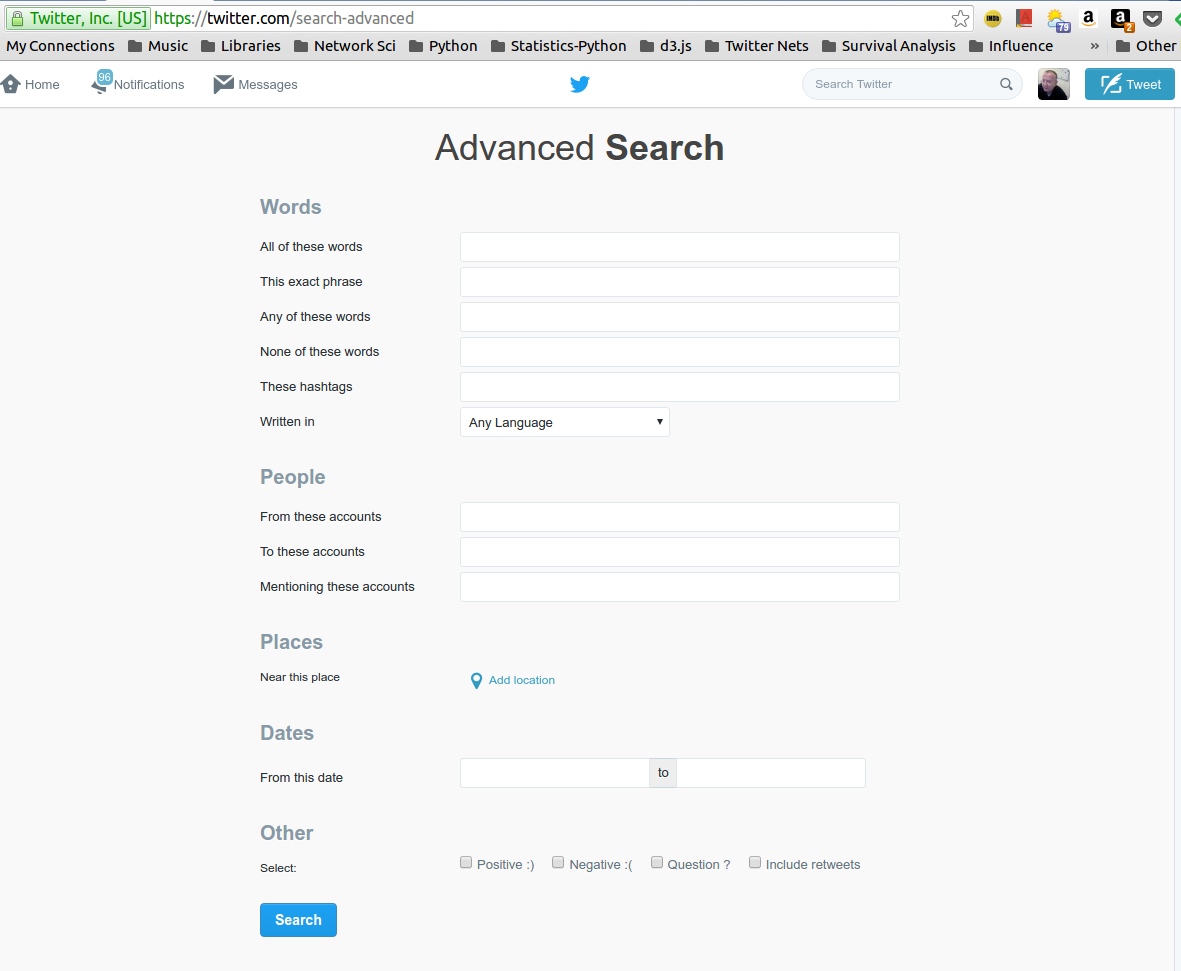

In [14]:
Image("pngs/twitter_search.png")

### **If the searched term is a hashtag (or multiple hashtags), one should continue with the *Beaker Notebook* *https://pub.beakernotebook.com/publications/ee134c26-2b23-11e6-abb8-6fa10fd07640?fullscreen=true*.**

### **Otherwise (for non-hashtag-type search terms), one has to open the page with the outcome of the Twitter search, copy the substring in the URL that follows 'search?q=' before '&src=" and paste it in the second cell of the *Twitter Scraping in Ruby Beaker Notebook* after 'searchterm='. In the search below, it suffices to copy the string 'day%20night%20paris'.**

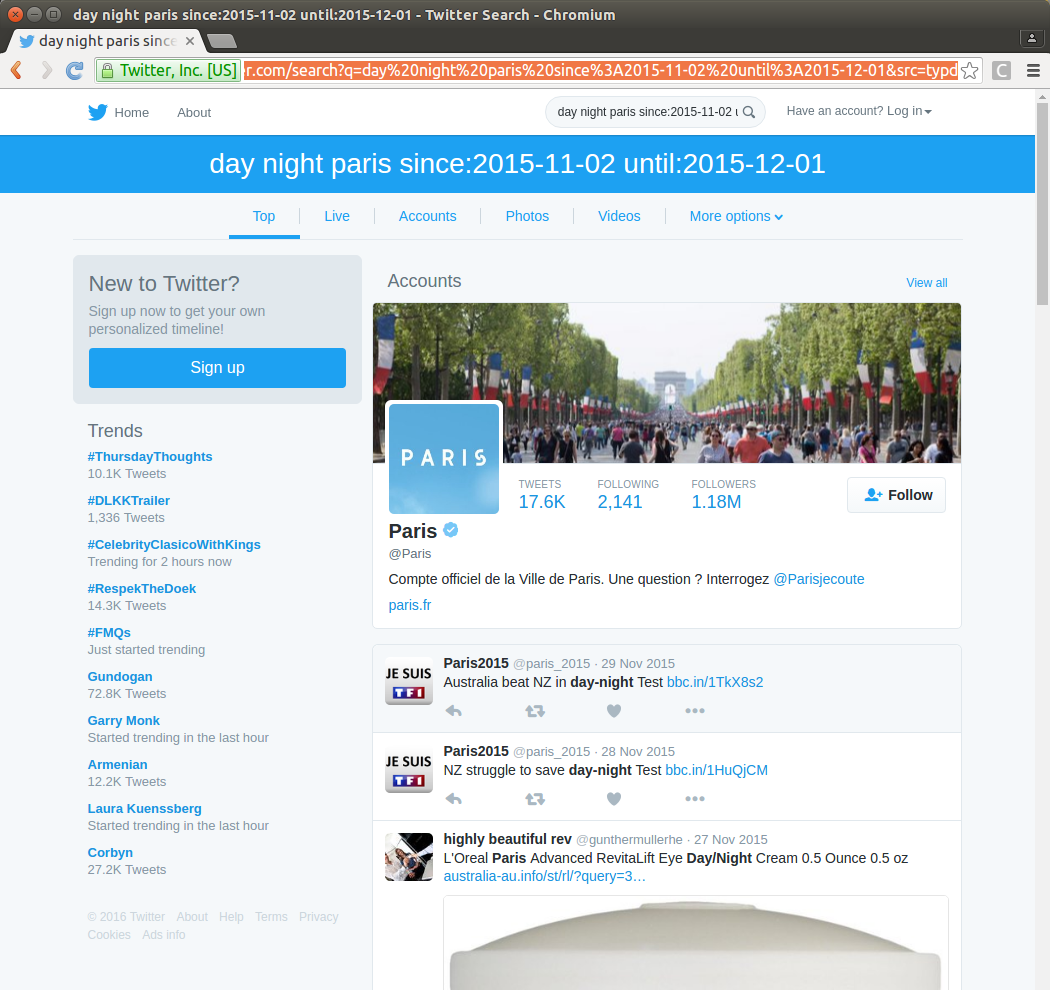

In [15]:
Image("pngs/twitter_search_result.png")

<a id='V'></a>
## V. Statistical & Network Analysis

## **This is done in the *Beaker Notebook* https://pub.beakernotebook.com/publications/3a62f03e-27e8-11e6-9ac4-6732ff96645f?fullscreen=true**